## Data Preprocessing and Training - American Express Default 

- Objective: create a cleaned development dataset by preprocessing the existing data to then be used in the modeling stage.

- Process: perform different operations on the 'amex_clean_data.csv'. These operations may include: creating dummy variables for binary categorical data, SMOTE to balance classes, standarizing and/or scaling the data to make it fit for a classification model. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

**Data Loading**  


We start by loading the dataset into a Pandas DataFrame. This step is crucial for understanding the structure of the dataset and determining which preprocessing steps are necessary.


In [2]:
# encapsulating code to create a load_data function for possible reuse
def load_data(path):
    return pd.read_csv(path)

path = '/Users/camilods16/Documents/Project-2-AmEx-Credit-Card-Default-/Project-2-AmEx-Credit-Card-Default-/data/interim/amex_train.csv'
train_df = load_data(path)
train_df.head()

,Unnamed: 0,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used_pctg,credit_score,prev_defaults,default_in_last_6months,credit_card_default,customer_id
0,0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,CST_115179
1,1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,CST_121920
2,2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,CST_109330
3,3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,CST_128288
4,4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,CST_151355


**Removing Columns Due to Multicollinearity**  

The dataset contains some columns that are not required for the modeling process. We remove these to streamline the DataFrame. Furthermore, due to multicollinearity, we will drop one of each pair of variables: 

    - net_yearly_income & credit_limit = 0.99 Pearson correlation
    
    - total_family_members & no_of_children = 0.87 Pearson correlation

For the following variables, we will combine them to remove multicollinearity:

    - prev_defaults & default_in_last_6months = 0.81 Pearson correlation

In [3]:
# removing features
train_df = train_df.drop(columns=['Unnamed: 0', 'credit_limit', 'no_of_children'], axis=1)

# combining variables
train_df['total_defaults'] = train_df['prev_defaults'] + train_df['default_in_last_6months']
train_df =  train_df.drop(columns=['prev_defaults', 'default_in_last_6months'], axis=1)

**Separating Features and Target Variable**  

For the modeling process, we separate the features and the target variable. We also remove any columns that won't be used in the model, such as 'customer_id'.


In [4]:
def separate_features_target(df, target_column):
    y = df[target_column]
    X = df.drop(columns=[target_column, 'customer_id'], axis=1)
    return X, y

X, y = separate_features_target(train_df, 'credit_card_default')

In [5]:
X.columns

Index(['age', 'gender', 'owns_car', 'owns_house', 'net_yearly_income',
       'no_of_days_employed', 'occupation_type', 'total_family_members',
       'migrant_worker', 'yearly_debt_payments', 'credit_limit_used_pctg',
       'credit_score', 'total_defaults'],
      dtype='object')

**Data Splitting**  

We split the dataset into training and test sets. This allows us to train the model on one subset and test it on another to evaluate its performance.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=246)

**Missing Value Imputation**  

Some columns have missing values that need to be imputed to prepare our dataset for the machine learning model. We use mean imputation for this purpose.


In [7]:
def impute_missing_values(X_train, X_test, columns):
    imputer = SimpleImputer(strategy='median')
    for col in columns:
        X_train[col] = imputer.fit_transform(X_train[[col]])
        X_test[col] = imputer.transform(X_test[[col]])

impute_missing_values(X_train, X_test, ['yearly_debt_payments', 'credit_score'])

**Data Encoding and Scaling**  

Finally, we encode the categorical variables and scale the numerical variables. Encoding is done via one-hot encoding, and scaling is performed using MinMaxScaler.


In [8]:
def preprocess_data(df):
    # Replace text values for binary variables
    replace_map = {'gender': {'F': 0, 'M': 1},
                   'owns_car': {'N': 0, 'Y': 1},
                   'owns_house': {'N': 0, 'Y': 1}}
    df.replace(replace_map, inplace=True)
    
    # One-hot encode occupation_type
    df = pd.get_dummies(df, columns=['occupation_type'], prefix=['ot'])
    
    return df

X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [9]:
X_train.head()

,age,gender,owns_car,owns_house,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit_used_pctg,...,ot_Low-skill Laborers,ot_Managers,ot_Medicine staff,ot_Private service staff,ot_Realty agents,ot_Sales staff,ot_Secretaries,ot_Security staff,ot_Unknown,ot_Waiters/barmen staff
7786,54,0,0,1,152620.28,365241.0,1.0,0.0,17174.95,28,...,False,False,False,False,False,False,False,False,True,False
4510,45,0,0,1,195000.95,365247.0,1.0,0.0,24914.37,88,...,False,False,False,False,False,False,False,False,True,False
27835,49,0,0,1,116471.27,2136.0,3.0,1.0,41638.64,6,...,False,False,False,True,False,False,False,False,False,False
42119,46,1,0,0,274753.63,986.0,3.0,0.0,21530.34,56,...,False,False,False,False,False,False,False,True,False,False
17853,36,1,1,0,234553.41,7326.0,4.0,0.0,67125.98,7,...,False,False,False,False,False,False,False,False,False,False


In [10]:
X_test.head()

,age,gender,owns_car,owns_house,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit_used_pctg,...,ot_Low-skill Laborers,ot_Managers,ot_Medicine staff,ot_Private service staff,ot_Realty agents,ot_Sales staff,ot_Secretaries,ot_Security staff,ot_Unknown,ot_Waiters/barmen staff
28172,40,0,1,1,180097.34,1228.0,3.0,1.0,23711.41,97,...,False,False,False,False,False,True,False,False,False,False
15797,49,1,0,1,300847.13,1339.0,3.0,0.0,51920.12,31,...,False,False,False,False,False,False,False,False,False,False
33000,47,0,0,1,175328.41,1568.0,2.0,0.0,34157.04,88,...,False,False,False,False,False,True,False,False,False,False
15310,32,1,1,1,136905.24,365241.0,4.0,0.0,31362.68,96,...,False,False,False,False,False,False,False,False,True,False
285,30,0,0,0,79336.23,365247.0,1.0,0.0,19200.23,43,...,False,False,False,False,False,False,False,False,True,False


In [11]:
def normalize_data(train, test):
    scaler = MinMaxScaler()
    train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
    test = pd.DataFrame(scaler.transform(test), columns=test.columns)  #  same scaler to avoid data leakage
    return train, test

X_train_scaled, X_test_scaled = normalize_data(X_train, X_test)

In [12]:
X_train_scaled.tail()

,age,gender,owns_car,owns_house,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit_used_pctg,...,ot_Low-skill Laborers,ot_Managers,ot_Medicine staff,ot_Private service staff,ot_Realty agents,ot_Sales staff,ot_Secretaries,ot_Security staff,ot_Unknown,ot_Waiters/barmen staff
31864,0.75000,1.0,1.0,0.0,0.041529,0.000556,0.222222,0.0,0.144211,0.464646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31865,0.03125,0.0,0.0,1.0,0.030288,0.003581,0.111111,0.0,0.158185,0.070707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31866,0.53125,0.0,1.0,1.0,0.071649,0.005714,0.222222,0.0,0.133740,0.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31867,0.81250,0.0,0.0,1.0,0.037211,0.004151,0.111111,0.0,0.149717,0.939394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31868,0.31250,0.0,0.0,1.0,0.019576,0.003866,0.111111,0.0,0.039081,0.020202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_test_scaled.head()

,age,gender,owns_car,owns_house,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit_used_pctg,...,ot_Low-skill Laborers,ot_Managers,ot_Medicine staff,ot_Private service staff,ot_Realty agents,ot_Sales staff,ot_Secretaries,ot_Security staff,ot_Unknown,ot_Waiters/barmen staff
0,0.53125,0.0,1.0,1.0,0.034704,0.003357,0.222222,1.0,0.077514,0.979798,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.81250,1.0,0.0,1.0,0.062105,0.003661,0.222222,0.0,0.179339,0.313131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.75000,0.0,0.0,1.0,0.033621,0.004287,0.111111,0.0,0.115220,0.888889,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.28125,1.0,1.0,1.0,0.024902,0.999970,0.333333,0.0,0.105133,0.969697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.21875,0.0,0.0,0.0,0.011838,0.999986,0.000000,0.0,0.061230,0.434343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Handling Class Imbalance: SMOTE**

Below we will apply SMOTE to balance the classes on the dependent variable so the model will not be biased towards the current majority class - No Credit Card Default. 

In [14]:

# Oversampling using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [22]:
y_df = pd.DataFrame(y_train_res, columns=['credit_card_default'])

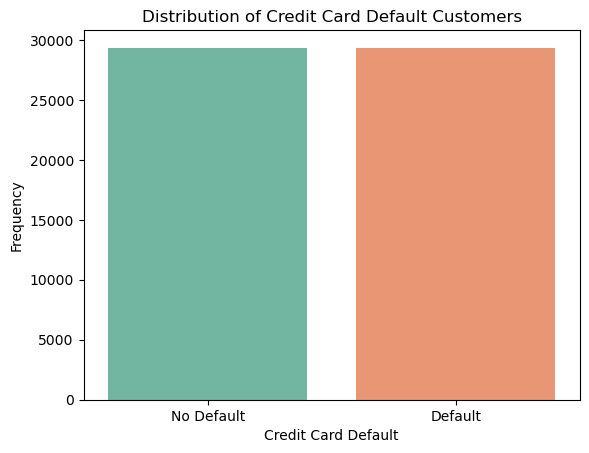

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=y_df, x='credit_card_default', palette='Set2')
plt.title('Distribution of Credit Card Default Customers')
plt.xlabel('Credit Card Default')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Default', 'Default'])
plt.savefig('../reports/figures/class_balanced.png')
plt.show()

In [15]:
# Define the paths where you want to save the CSV files
path_train_features = '../data/processed/X_train_scaled.csv'
path_test_features = '../data/processed/X_test_scaled.csv'
path_train_target = '../data/processed/y_train.csv'
path_test_target = '../data/processed/y_test.csv'

# Save the data frames to CSV files
X_train_res.to_csv(path_train_features, index=False)
X_test_scaled.to_csv(path_test_features, index=False)
y_train_res.to_csv(path_train_target, index=False)
y_test.to_csv(path_test_target, index=False)

**Summary**  

We have successfully preprocessed the dataset. This involved loading the data, removing columns due to multicollinearity, separating features from the target variable, creating new features to mitigate multicollinearity, splitting the data into training and test sets, imputing missing values, encoding and scaling the variables and finally, handling class imbalance with SMOTE. This preprocessed data is now ready for modeling.
